In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
file_path ='C:\\Users\\abhin\\Downloads\\diabetes_prediction.csv'

In [3]:
df=pd.read_csv(file_path)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.dtypes.value_counts()

int64      4
float64    3
object     2
Name: count, dtype: int64

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.duplicated().sum()

3854

In [9]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [10]:
cols=['hypertension','heart_disease']
df.drop(cols,axis=1,inplace=True)

In [11]:
num=df.select_dtypes(include=['number']).columns
cat=df.select_dtypes(include=['object','category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['gender', 'smoking_history'], dtype='object')
num: Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')


In [12]:
df.head()

,gender,age,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,never,25.19,6.6,140,0
1,Female,54.0,No Info,27.32,6.6,80,0
2,Male,28.0,never,27.32,5.7,158,0
3,Female,36.0,current,23.45,5.0,155,0
4,Male,76.0,current,20.14,4.8,155,0


# categorical Analysis

In [13]:
cat

Index(['gender', 'smoking_history'], dtype='object')

In [14]:
for i in cat:
    a=df[i].unique()
    print(i,a)

gender ['Female' 'Male' 'Other']
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [15]:
for i in cat:
    b=df[i].nunique()
    print(i,b)

gender 3
smoking_history 6


# Bar graph

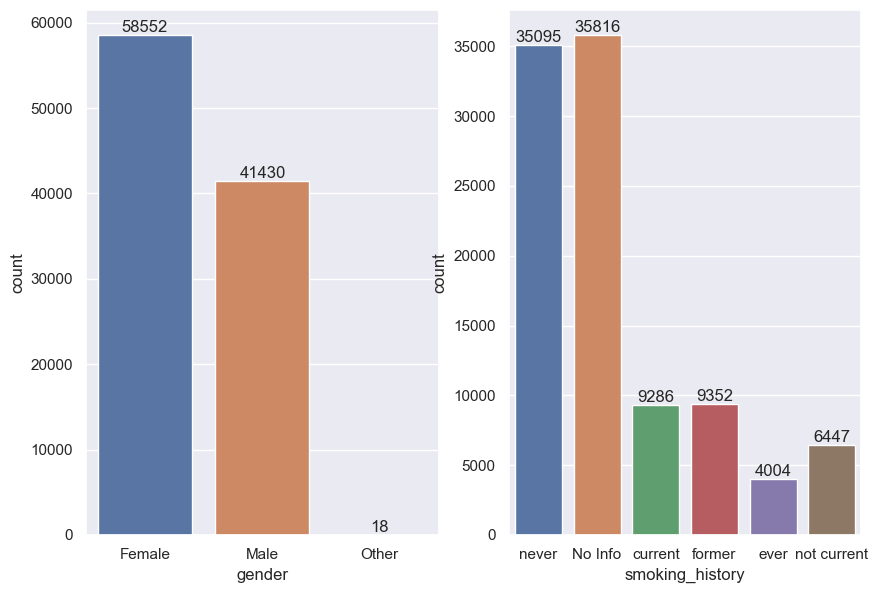

In [16]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat):
    plt.subplot(2,2,i+1)
    
    ax=sns.countplot(data=df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

# Pie Chart

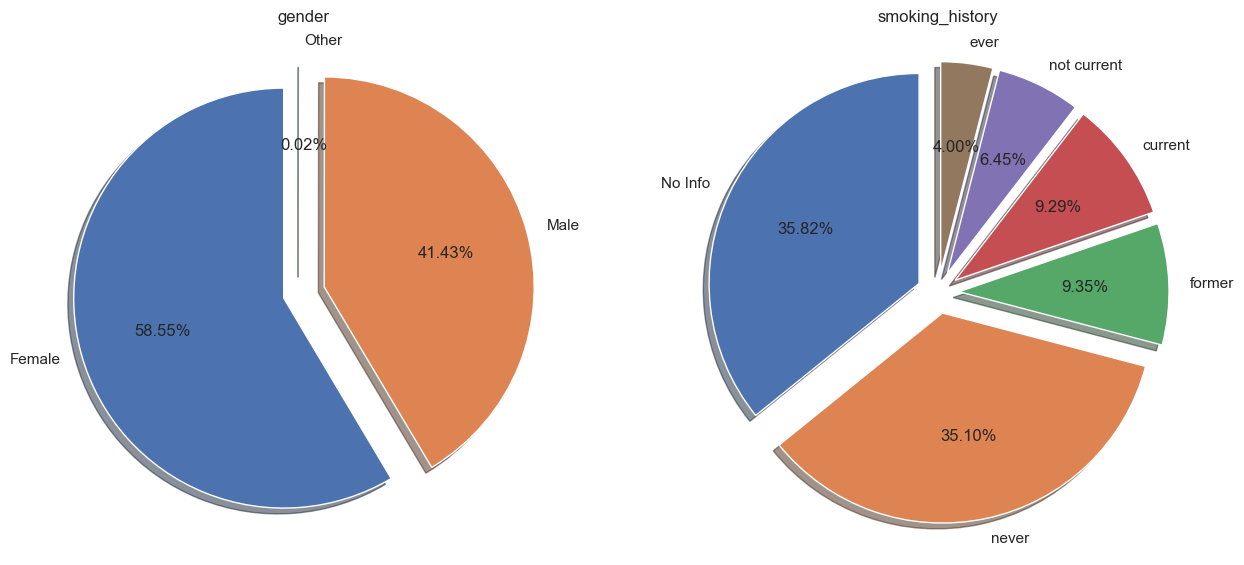

In [17]:
plt.figure(figsize=(15,15))
for i,column in enumerate(cat):
    plt.subplot(2,2,i+1)
    df[column].value_counts()
    Property=df[column].value_counts(normalize=True).keys()
    count=df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

# Bar chart and Pie Chart

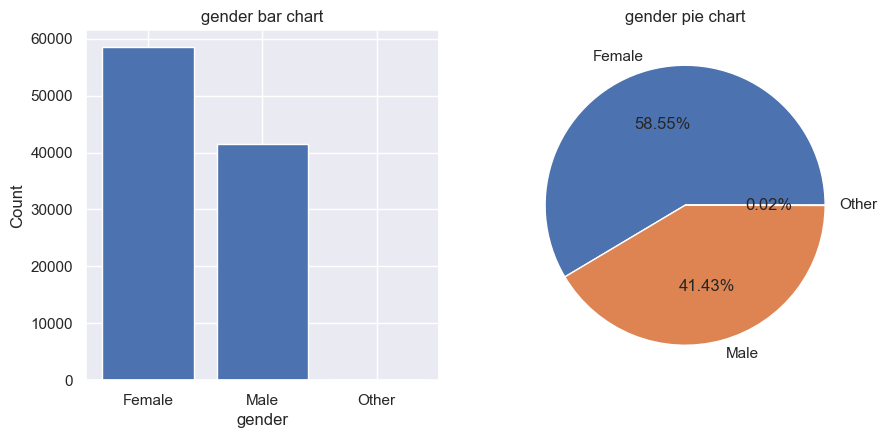

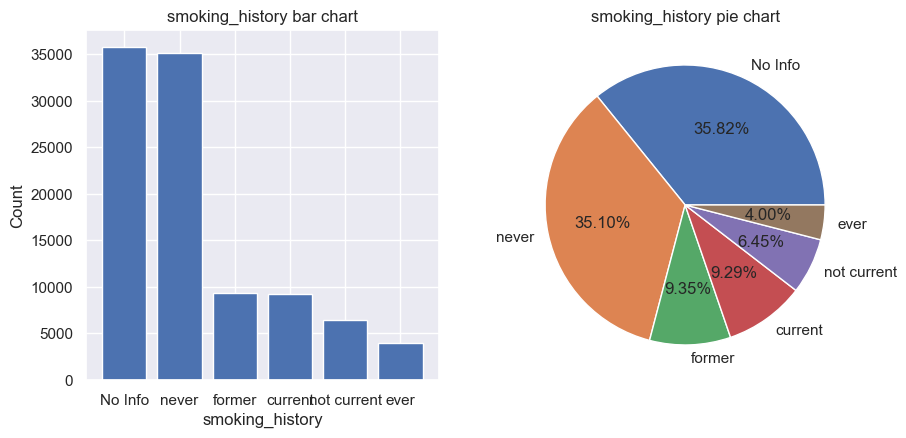

In [18]:
for column in cat:
    
    df[column].value_counts()
    Property=df[column].value_counts().keys()
    count=df[column].value_counts().values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    Data
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title(f'{column} bar chart')
    plt.bar(column,'Count',data=Data)
    
    plt.xlabel(column)
    plt.ylabel('Count')
    
   
    plt.subplot(2,2,2)
    plt.title(f'{column} pie chart')
    plt.pie(x=count,labels=Property,autopct='%0.2f%%')
    
    plt.show()

# Numerical Data Analysis

In [19]:
for i in num:
    d_count=round(df[i].count(),2)
    d_max=round(df[i].max(),2)
    d_min=round(df[i].min(),2)
    d_mean=round(df[i].mean(),2)
    d_median=round(df[i].median(),2)
    d_std=round(df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

age count: 100000
age max: 80.0
age min: 0.08
age mean: 41.89
age median: 43.0
age std: 22.52
------------------------------------
bmi count: 100000
bmi max: 95.69
bmi min: 10.01
bmi mean: 27.32
bmi median: 27.32
bmi std: 6.64
------------------------------------
HbA1c_level count: 100000
HbA1c_level max: 9.0
HbA1c_level min: 3.5
HbA1c_level mean: 5.53
HbA1c_level median: 5.8
HbA1c_level std: 1.07
------------------------------------
blood_glucose_level count: 100000
blood_glucose_level max: 300
blood_glucose_level min: 80
blood_glucose_level mean: 138.06
blood_glucose_level median: 140.0
blood_glucose_level std: 40.71
------------------------------------
diabetes count: 100000
diabetes max: 1
diabetes min: 0
diabetes mean: 0.08
diabetes median: 0.0
diabetes std: 0.28
------------------------------------


In [20]:
for i in num:
    q1=np.quantile(df[i],0.25)
    q2=np.quantile(df[i],0.50)
    q3=np.quantile(df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

age q1: 24.0
age q2: 43.0
age q3: 3
------------
bmi q1: 23.63
bmi q2: 27.32
bmi q3: 3
------------
HbA1c_level q1: 4.8
HbA1c_level q2: 5.8
HbA1c_level q3: 3
------------
blood_glucose_level q1: 100.0
blood_glucose_level q2: 140.0
blood_glucose_level q3: 3
------------
diabetes q1: 0.0
diabetes q2: 0.0
diabetes q3: 3
------------


In [21]:
df.describe()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060,0.085000
std,22.516840,6.636783,1.070672,40.708136,0.278883
min,0.080000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,95.690000,9.000000,300.000000,1.000000


# Histogram

In [22]:
num

Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')

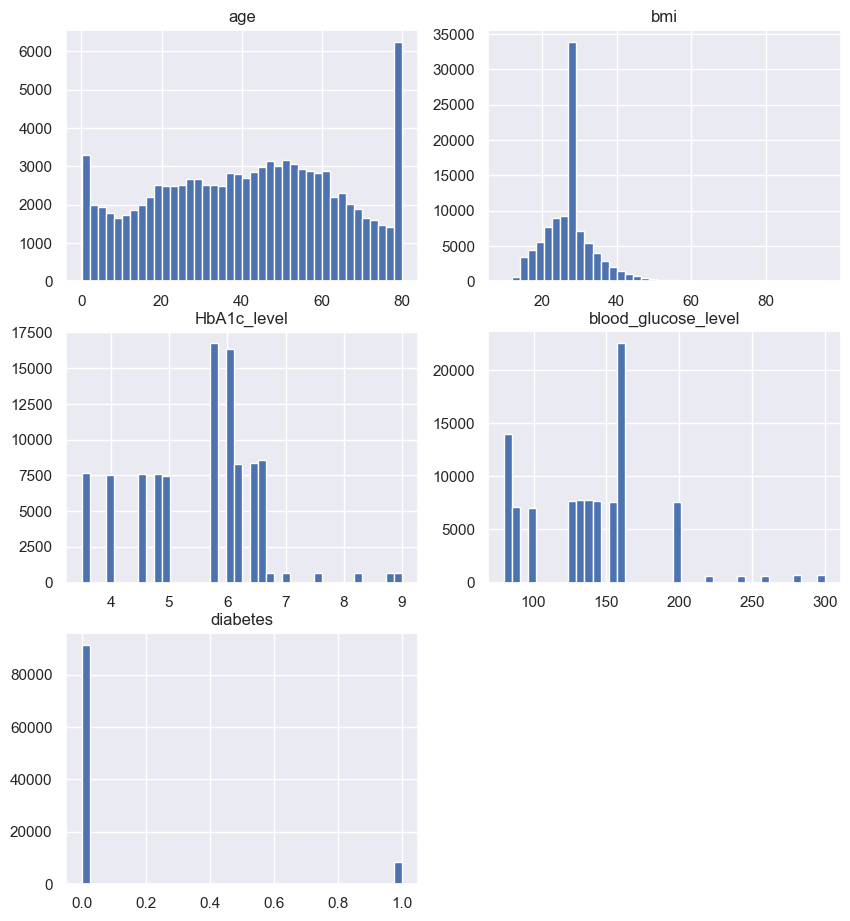

In [23]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(df[column],bins=40)
plt.show()

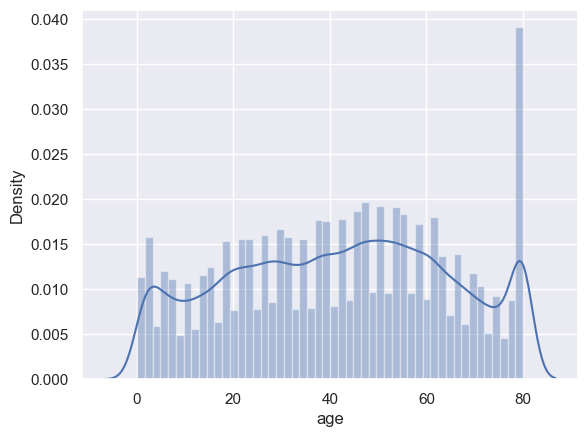

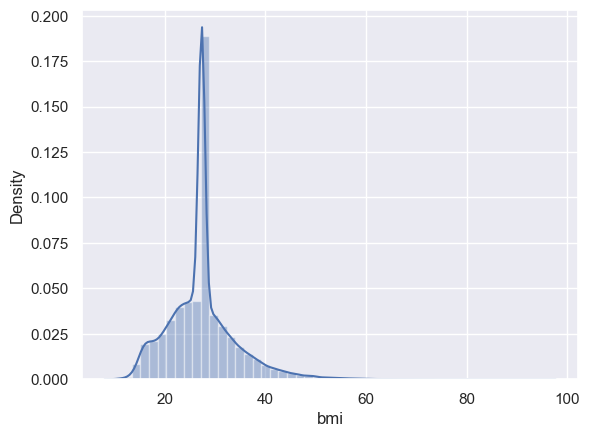

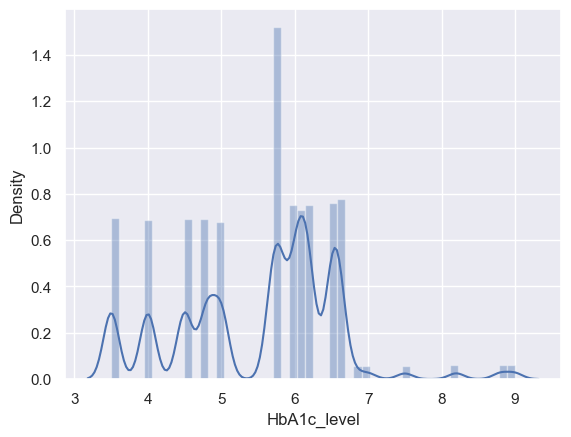

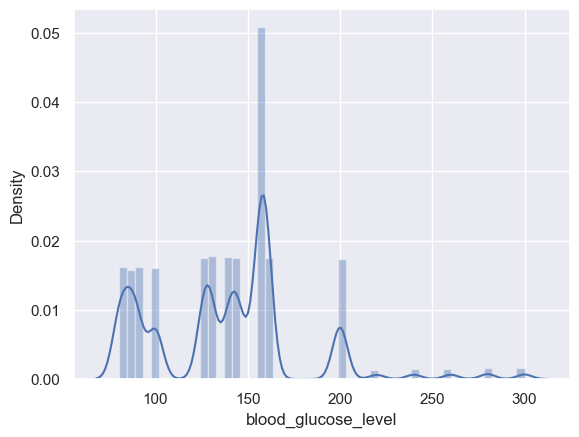

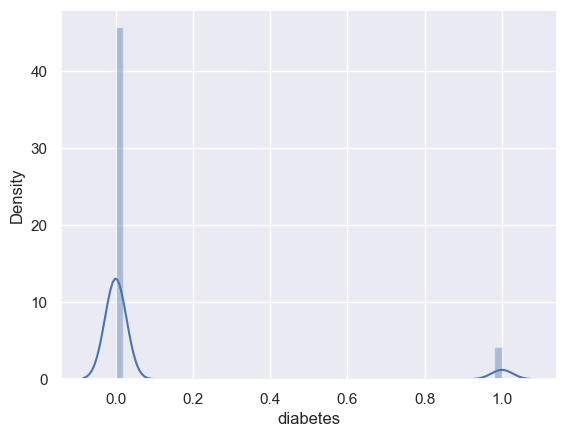

In [24]:
for i in num:
    sns.distplot(df[i])
    plt.show()

# Empirical Rule

In [25]:
num

Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')

In [26]:
mean=df['age'].mean()
std=df['age'].std()

In [27]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=df['age']>val_minus_1
con2=df['age']<val_plus_1

ep1=len(df[con1&con2])
ep2=ep1/len(df)

con3=df['age']>val_minus_2
con4=df['age']<val_plus_2

ep3=len(df[con3&con4])
ep4=ep3/len(df)

con5=df['age']>val_minus_3
con6=df['age']<val_plus_3
ep5=len(df[con3&con4])
ep6=ep5/len(df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.61764
ep2: 1.0
ep3: 1.0


In [28]:
mean=df['bmi'].mean()
std=df['bmi'].std()

In [29]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=df['bmi']>val_minus_1
con2=df['bmi']<val_plus_1

ep1=len(df[con1&con2])
ep2=ep1/len(df)

con3=df['bmi']>val_minus_2
con4=df['bmi']<val_plus_2

ep3=len(df[con3&con4])
ep4=ep3/len(df)

con5=df['bmi']>val_minus_3
con6=df['bmi']<val_plus_3
ep5=len(df[con3&con4])
ep6=ep5/len(df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.73195
ep2: 0.95248
ep3: 0.95248


In [30]:
mean=df['HbA1c_level'].mean()
std=df['HbA1c_level'].std()

In [31]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=df['HbA1c_level']>val_minus_1
con2=df['HbA1c_level']<val_plus_1

ep1=len(df[con1&con2])
ep2=ep1/len(df)

con3=df['HbA1c_level']>val_minus_2
con4=df['HbA1c_level']<val_plus_2

ep3=len(df[con3&con4])
ep4=ep3/len(df)

con5=df['HbA1c_level']>val_minus_3
con6=df['HbA1c_level']<val_plus_3
ep5=len(df[con3&con4])
ep6=ep5/len(df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.72361
ep2: 0.98024
ep3: 0.98024


In [32]:
mean=df['blood_glucose_level'].mean()
std=df['blood_glucose_level'].std()

In [33]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=df['blood_glucose_level']>val_minus_1
con2=df['blood_glucose_level']<val_plus_1

ep1=len(df[con1&con2])
ep2=ep1/len(df)

con3=df['blood_glucose_level']>val_minus_2
con4=df['blood_glucose_level']<val_plus_2

ep3=len(df[con3&con4])
ep4=ep3/len(df)

con5=df['blood_glucose_level']>val_minus_3
con6=df['blood_glucose_level']<val_plus_3
ep5=len(df[con3&con4])
ep6=ep5/len(df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.68004
ep2: 0.96723
ep3: 0.96723


In [34]:
mean=df['diabetes'].mean()
std=df['diabetes'].std()

In [35]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=df['diabetes']>val_minus_1
con2=df['diabetes']<val_plus_1

ep1=len(df[con1&con2])
ep2=ep1/len(df)

con3=df['diabetes']>val_minus_2
con4=df['diabetes']<val_plus_2

ep3=len(df[con3&con4])
ep4=ep3/len(df)

con5=df['diabetes']>val_minus_3
con6=df['diabetes']<val_plus_3
ep5=len(df[con3&con4])
ep6=ep5/len(df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.915
ep2: 0.915
ep3: 0.915


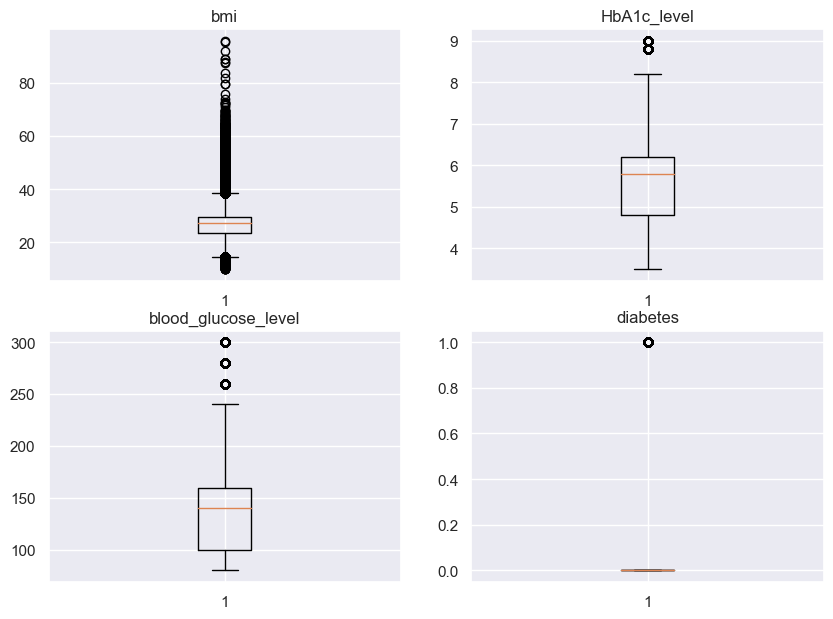

In [36]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num[1:]):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

In [37]:
df['blood_glucose_level'].value_counts().sum()

100000

In [38]:
df['blood_glucose_level'].value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [39]:
q1=np.quantile(df['blood_glucose_level'],0.25)
q2=np.quantile(df['blood_glucose_level'],0.50)
q3=np.quantile(df['blood_glucose_level'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=df['blood_glucose_level']>ub1
con2=df['blood_glucose_level']<lb1
outlier=df['blood_glucose_level'][con1|con2].values
outlier

array([260, 300, 280, ..., 300, 300, 280], dtype=int64)

In [40]:
len(outlier)

2038

In [41]:
2038*100


203800

In [42]:
203800/100000

2.038

In [43]:
df['HbA1c_level'].value_counts()

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

In [44]:
df['HbA1c_level'].value_counts().sum()

100000

In [45]:
q1=np.quantile(df['HbA1c_level'],0.25)
q2=np.quantile(df['HbA1c_level'],0.50)
q3=np.quantile(df['HbA1c_level'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=df['HbA1c_level']>ub2
con2=df['HbA1c_level']<lb2
outlier1=df['HbA1c_level'][con1|con2].values
outlier1

array([9. , 9. , 8.8, ..., 9. , 9. , 8.8])

In [46]:
len(outlier1)

1315

In [47]:
1315*100

131500

In [48]:
131500/100000

1.315

In [49]:
q1=np.quantile(df['bmi'],0.25)
q2=np.quantile(df['bmi'],0.50)
q3=np.quantile(df['bmi'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=df['bmi']>ub3
con2=df['bmi']<lb3
outlier2=df['bmi'][con1|con2].values
outlier2

array([54.7 , 13.99, 56.43, ..., 60.52, 45.15, 40.69])

In [50]:
len(outlier2)

7086

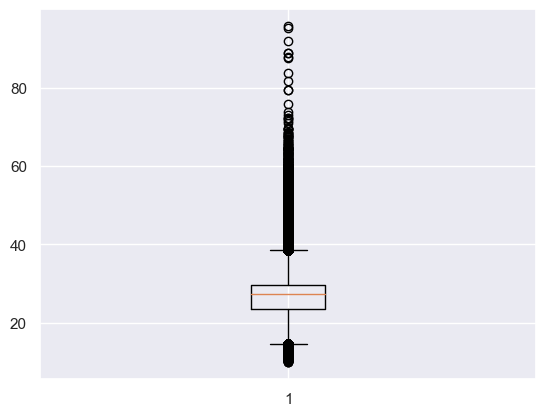

In [51]:
plt.boxplot(df['bmi'])
plt.show()

In [52]:
df['bmi']=np.clip(df['bmi'],lb3,ub3)

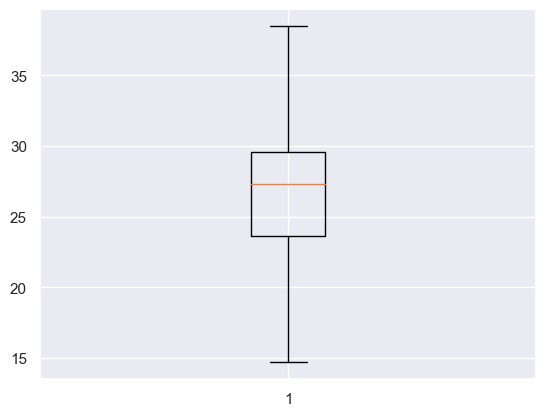

In [53]:
plt.boxplot(df['bmi'])
plt.show()

# linerity

In [54]:
for i in (num):
    print(i,df[i].skew())

age -0.05197899678256747
bmi 0.09889248328705559
HbA1c_level -0.0668537611478635
blood_glucose_level 0.8216549517517585
diabetes 2.9762170270940076


In [55]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

In [56]:
num

Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')

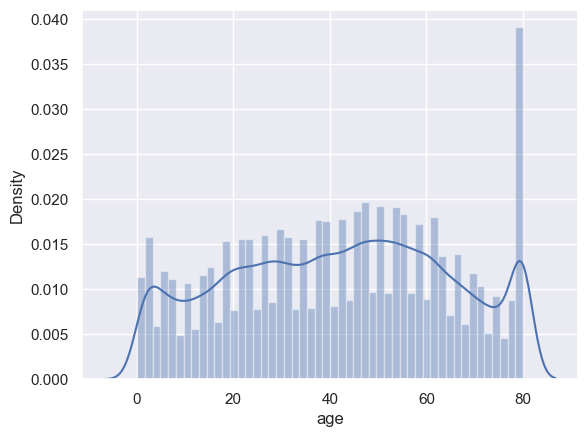

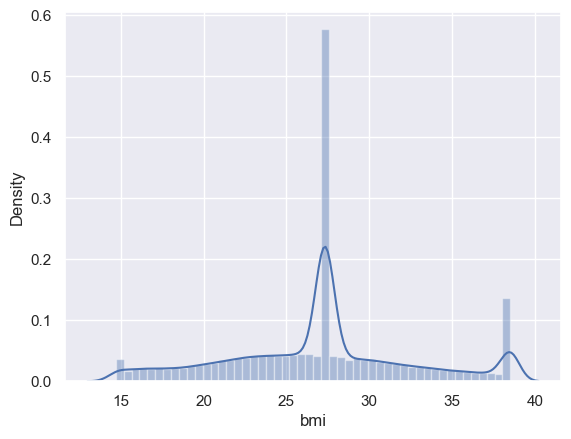

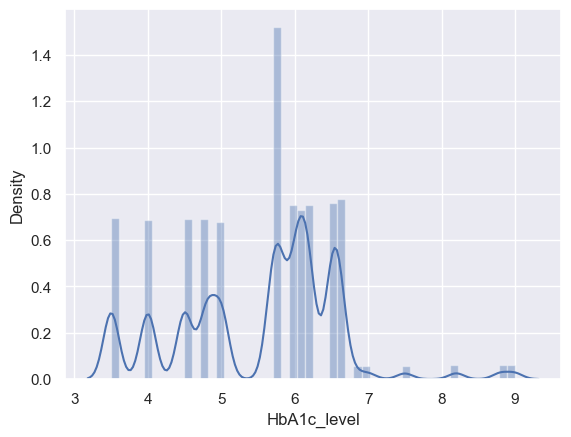

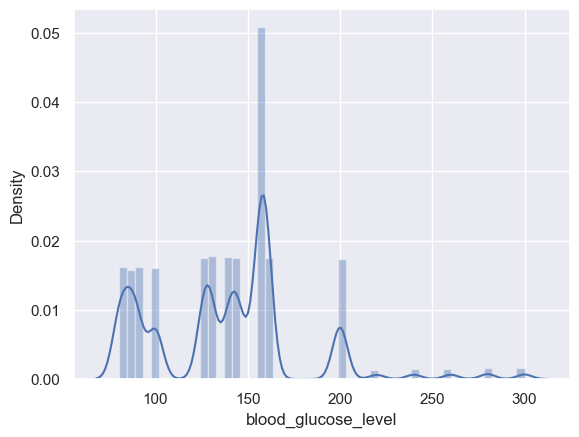

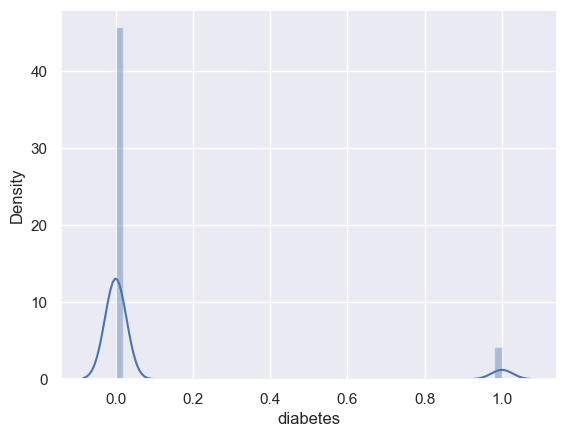

In [57]:
for i in num:
    sns.distplot(df[i])
    plt.show()

# Bivariate Analysis

In [58]:
cat

Index(['gender', 'smoking_history'], dtype='object')

In [59]:
col1=pd.crosstab(df['gender'],df['smoking_history'])

In [60]:
col1

smoking_history,No Info,current,ever,former,never,not current
gender,,,,,,
Female,19700,5058,2238,4774,22869,3913
Male,16110,4228,1765,4578,12223,2526
Other,6,0,1,0,3,8


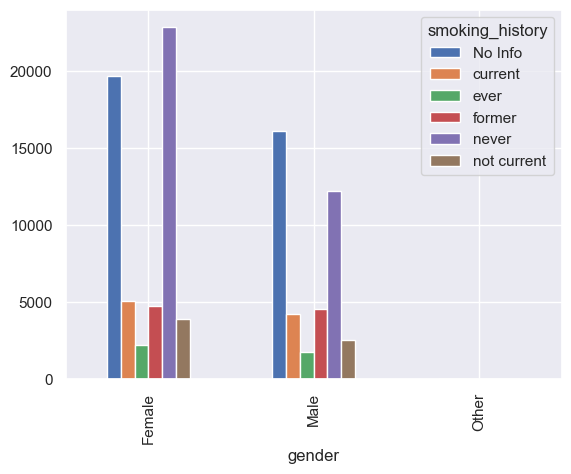

In [61]:
col1.plot(kind='bar')
plt.show()

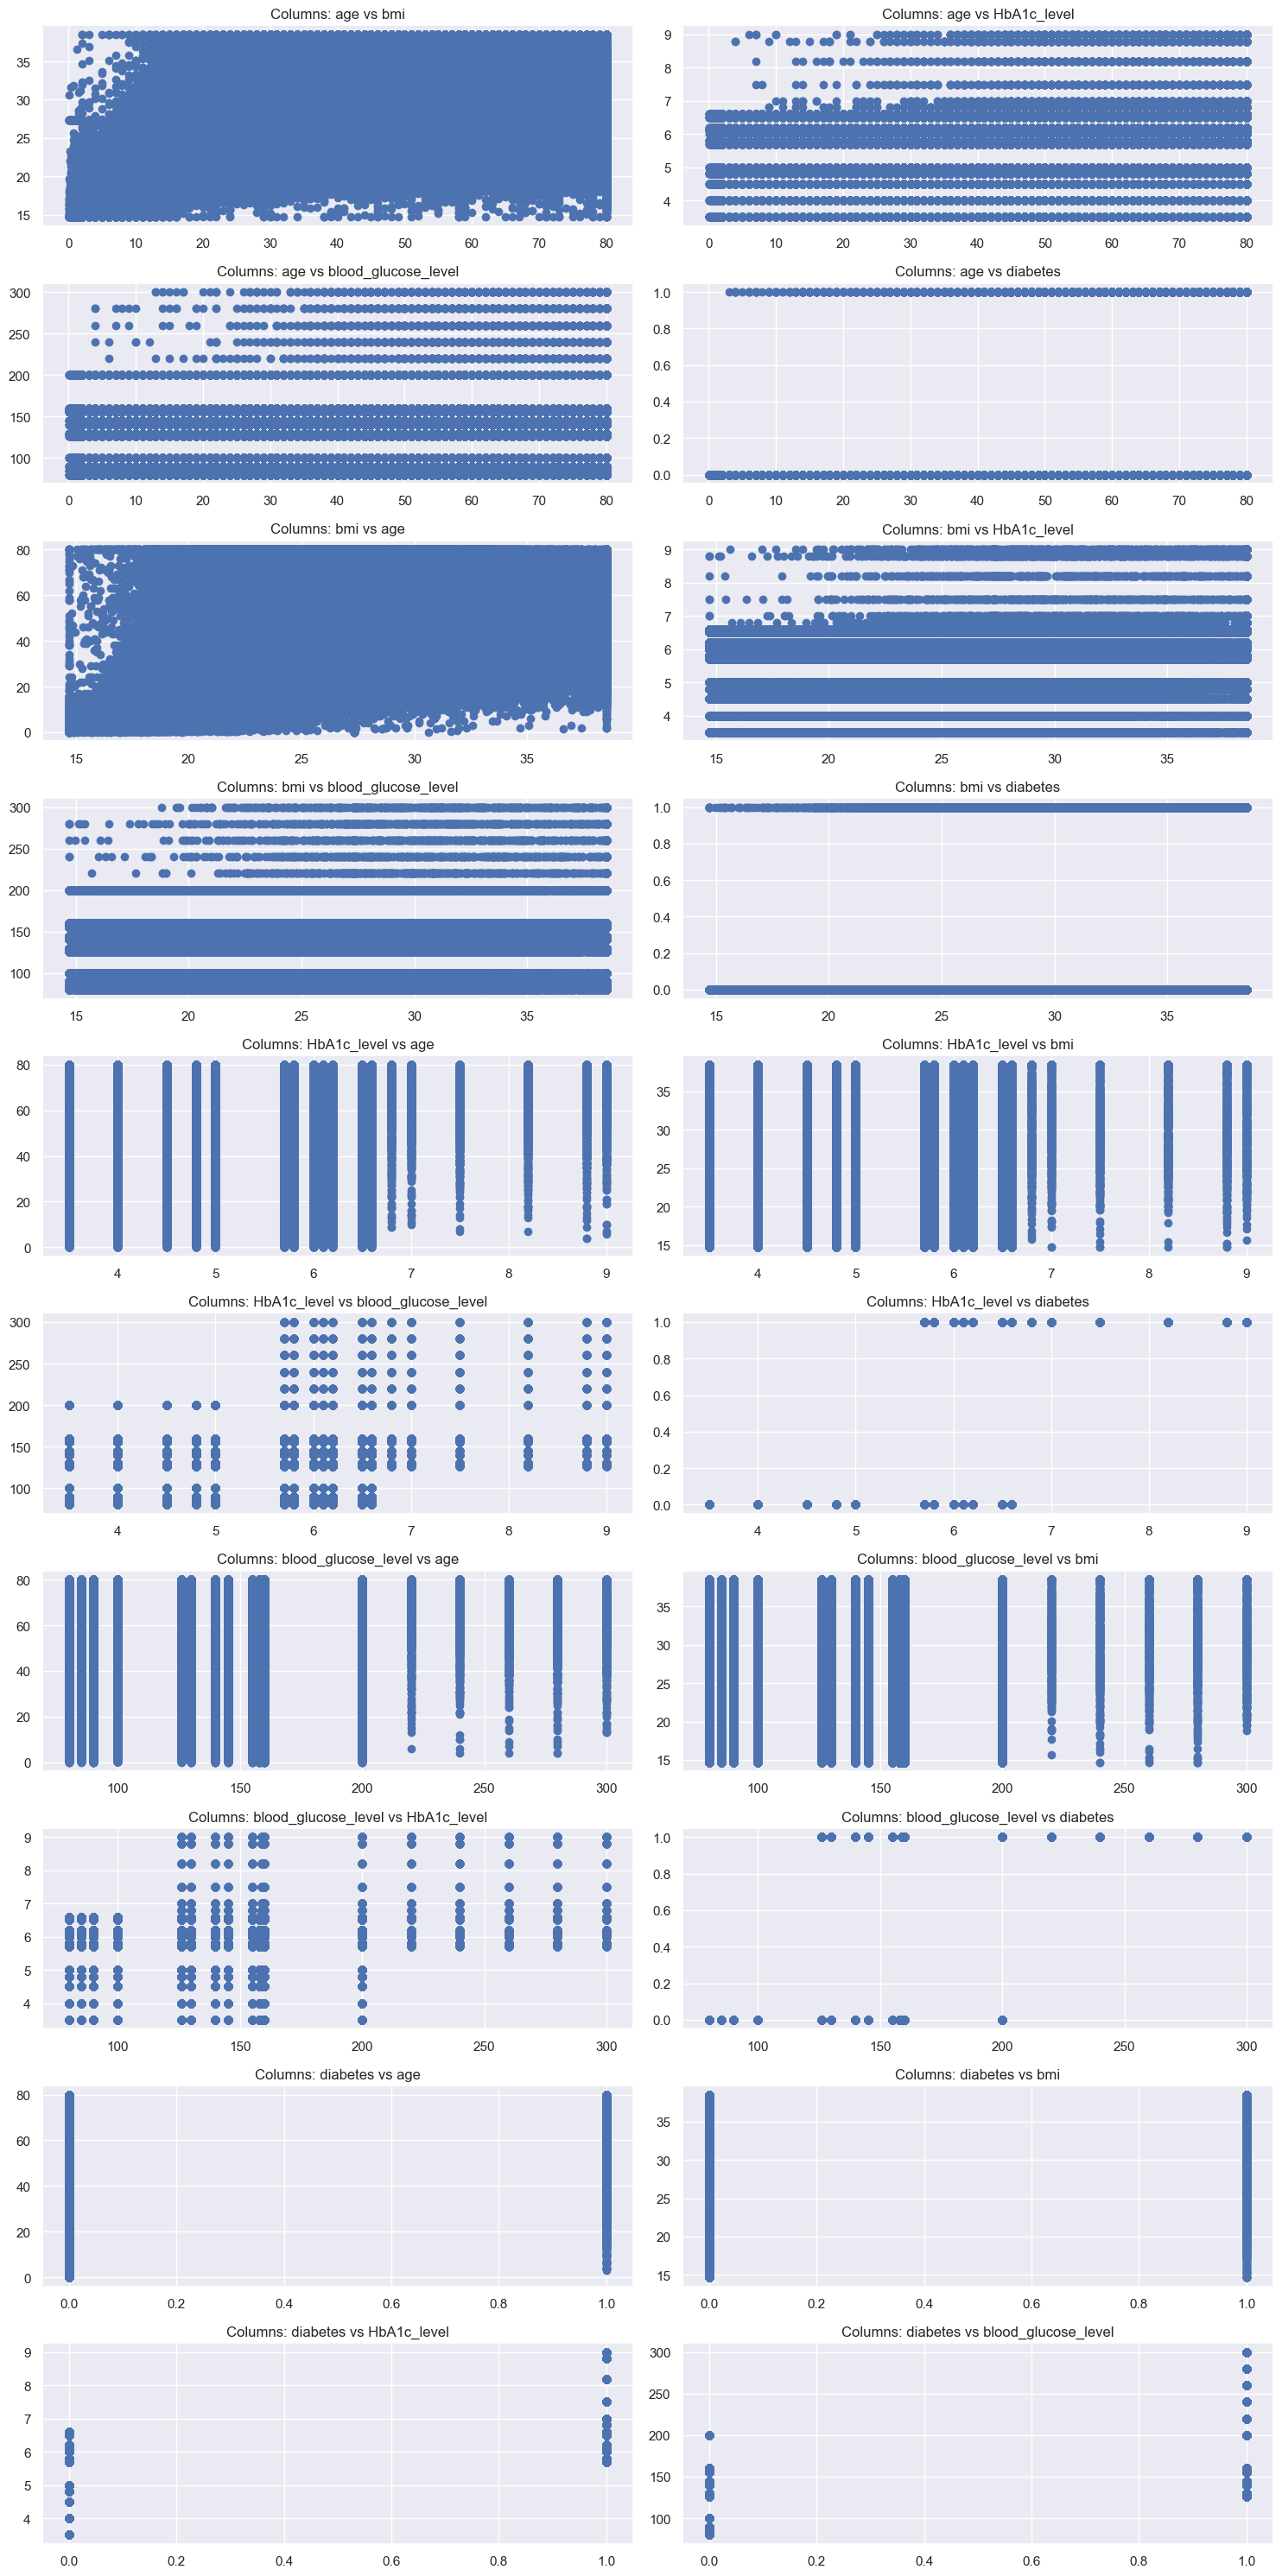

In [62]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 10* 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(df[i], df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# correlation

In [63]:
corr=df.corr(numeric_only=True)
corr

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.380410,0.101354,0.110672,0.258008
bmi,0.380410,1.000000,0.081466,0.090439,0.209656
HbA1c_level,0.101354,0.081466,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.090439,0.166733,1.000000,0.419558
diabetes,0.258008,0.209656,0.400660,0.419558,1.000000


# Heat Map

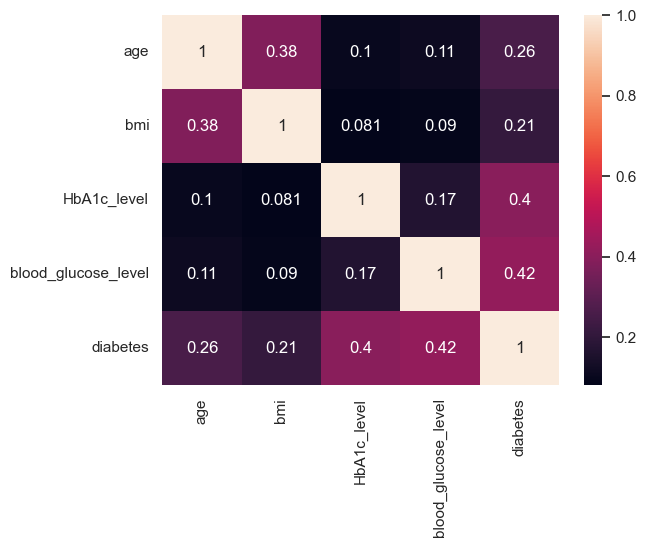

In [64]:
sns.heatmap(corr,annot=True)
plt.show()

# Convert categorical into numerical

In [65]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    

In [66]:
df

,gender,age,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,4,25.19,6.6,140,0
1,0,54.0,0,27.32,6.6,80,0
2,1,28.0,4,27.32,5.7,158,0
3,0,36.0,1,23.45,5.0,155,0
4,1,76.0,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,0,80.0,0,27.32,6.2,90,0
99996,0,2.0,0,17.37,6.5,100,0
99997,1,66.0,3,27.83,5.7,155,0
99998,0,24.0,4,35.42,4.0,100,0


# Machine learning

In [71]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [72]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [76]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 7)
(80000, 6)
(20000, 6)
(80000,)
(20000,)


# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred_dt = dtree.predict(X_test)

In [79]:
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [80]:
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
print('acc_dt:',acc_dt)
print('recall_dt:',recall_dt)
print('precision_dt:',precision_dt)
print('f1_dt:',f1_dt)

acc_dt: 95.32
recall_dt: 0.74
precision_dt: 0.72
f1_dt: 0.73


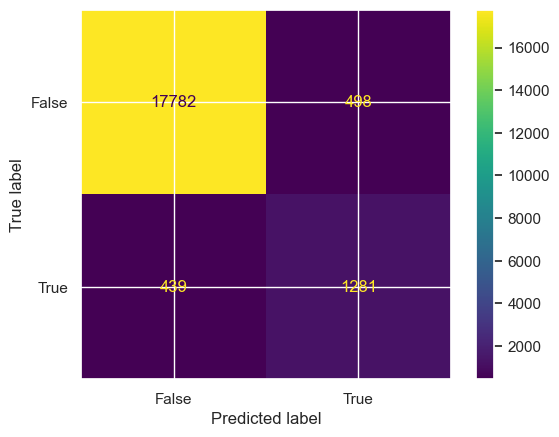

In [81]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])

disp.plot()
plt.grid(True)
plt.show()

In [82]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 17782
False postive: 498
False negative: 439
True postive: 1281


**ROC-AUC Curve**

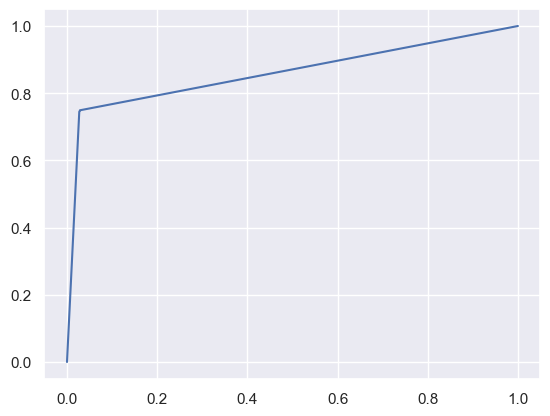

In [83]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)

# logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
logtree = LogisticRegression()
logtree.fit(X_train,y_train)

LogisticRegression()

In [85]:
y_pred_log=logtree.predict(X_test)

In [86]:
y_pred_log

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [87]:
acc_log=round(accuracy_score(y_test,y_pred_log)*100,2)
recall_log=round(recall_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
f1_log=round(f1_score(y_test,y_pred_log),2)
print('acc_log is:',acc_log)
print('recall is :',recall_log)
print('precision is:',precision_log)
print('f1 is:',f1_log)


acc_log is: 95.99
recall is : 0.63
precision is: 0.87
f1 is: 0.73


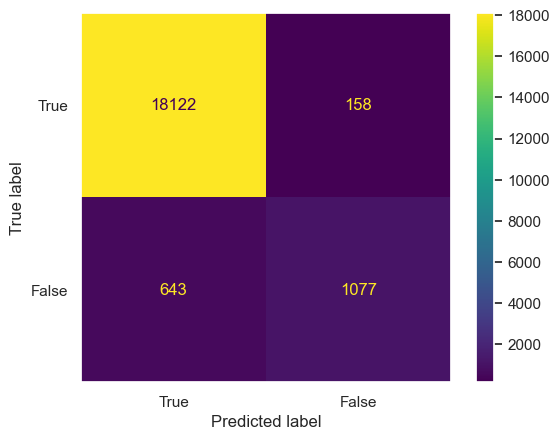

In [88]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[True,False])
disp.plot()
plt.grid(False)
plt.show()

In [89]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18122
False postive: 158
False negative: 643
True postive: 1077


**ROC-AUC Curve**

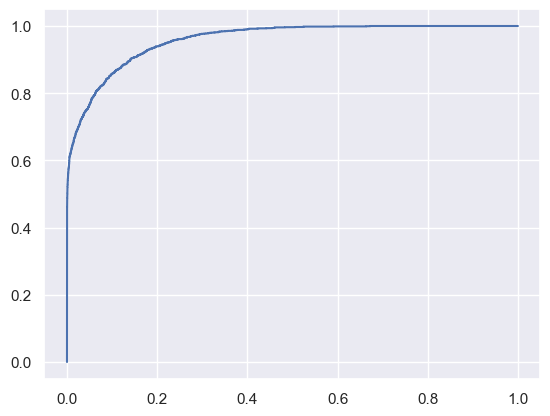

In [90]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

# Naive bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [92]:
y_pred_NB=NBtree.predict(X_test)

In [93]:
y_pred_NB

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 95.9
F1 is: 0.72
Precision is: 0.88
Recall is: 0.61


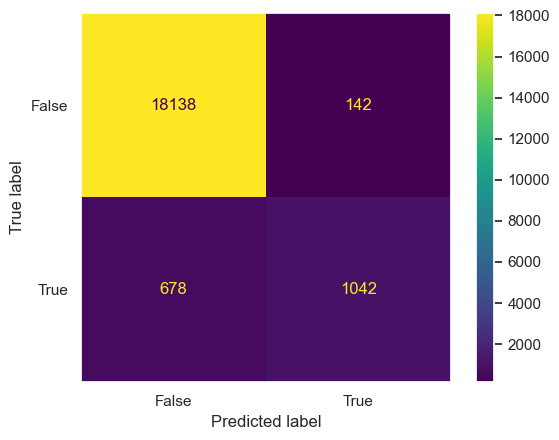

In [95]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [96]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18138
False postive: 142
False negative: 678
True postive: 1042


**ROC-AUC Curve**

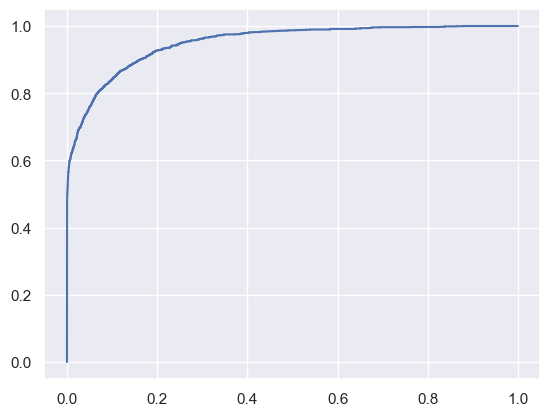

In [97]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

# KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred_KNN=KNNtree.predict(X_test)

In [100]:
y_pred_KNN

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 95.35
F1 is: 0.67
Precision is: 0.86
Recall is: 0.55


**Confusion Metrices**

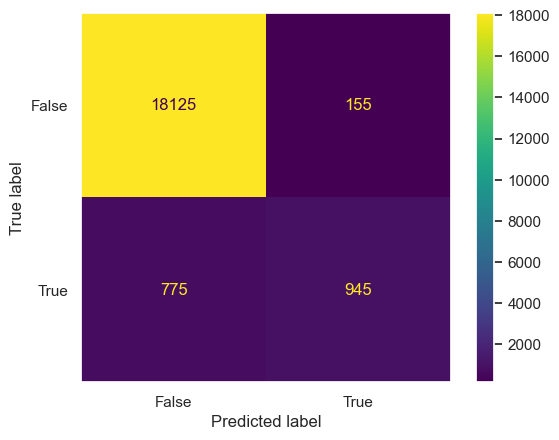

In [102]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [103]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18125
False postive: 155
False negative: 775
True postive: 945


**ROC-AUC Curve**

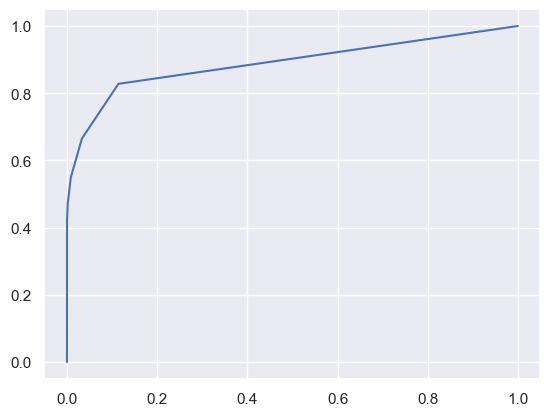

In [104]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
y_pred_RF=RFtree.predict(X_test)

In [108]:
y_pred_RF

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 96.9
F1 is: 0.79
Precision is: 0.93
Recall is: 0.69


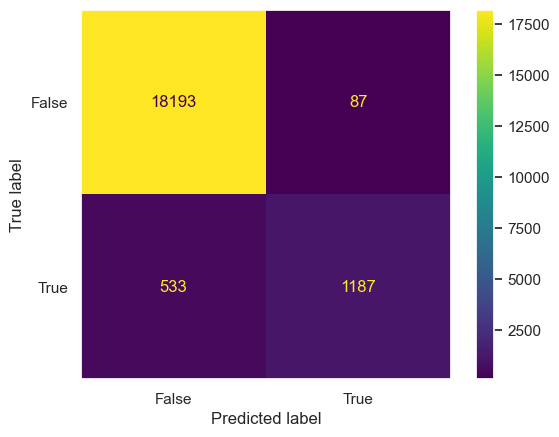

In [110]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [111]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18193
False postive: 87
False negative: 533
True postive: 1187


**ROC-AUC Curve**

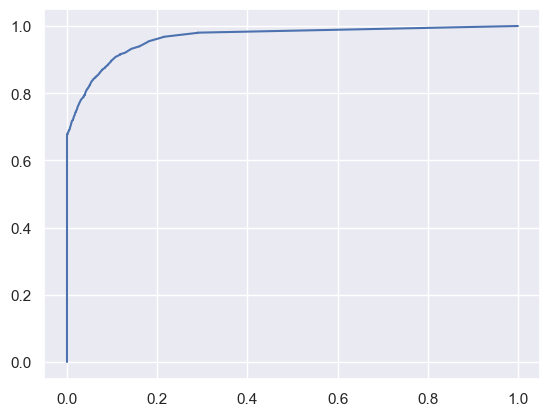

In [112]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

# Gradien Boosting

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [114]:
y_pred_GB=GB.predict(X_test)

In [115]:
y_pred_GB

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_GB= round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)


accuray is: 97.23
F1 is: 0.81
Precision is: 1.0
Recall is: 0.68


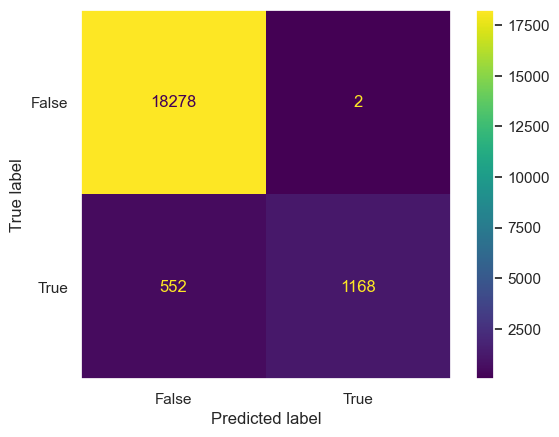

In [117]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_GB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [118]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18278
False postive: 2
False negative: 552
True postive: 1168


**ROC AUC Curve**

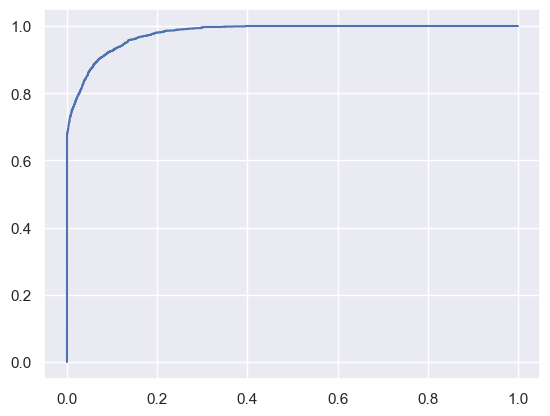

In [120]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_GB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Comparing Which model is best

In [121]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,Precision,Recall,F1-score
DT,95.32,0.72,0.74,0.73
KNN,95.35,0.86,0.55,0.67
Logistic,95.99,0.87,0.63,0.73
Naive Bayes,95.90,0.88,0.61,0.72
Random Forest,96.90,0.93,0.69,0.79
Gradient Boosting,97.23,1.00,0.68,0.81


In [122]:
df

,gender,age,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,4,25.19,6.6,140,0
1,0,54.0,0,27.32,6.6,80,0
2,1,28.0,4,27.32,5.7,158,0
3,0,36.0,1,23.45,5.0,155,0
4,1,76.0,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,0,80.0,0,27.32,6.2,90,0
99996,0,2.0,0,17.37,6.5,100,0
99997,1,66.0,3,27.83,5.7,155,0
99998,0,24.0,4,35.42,4.0,100,0


In [124]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [126]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(80000, 6)
(20000, 6)
(80000,)
(20000,)


In [127]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [128]:
gt=DecisionTreeClassifier()
gt

DecisionTreeClassifier()

In [130]:
gt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [131]:
param_gt={
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0,42]
}

In [132]:
import time
start=time.time()
gt_search=GridSearchCV(gt,param_gt,
                      scoring='accuracy',
                      cv=5,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [133]:
gt_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [135]:
start=time.time()
gt_search.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
total time taken is: 113.61892414093018


In [136]:
gt.fit(X_train,y_train)

DecisionTreeClassifier()

In [137]:
gt_search.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=0)

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=6,
                            min_samples_leaf=4,
                            min_samples_split=2,
                            random_state=0)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=0)

In [140]:
gt_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0}

In [141]:
y_pred_gt=dtree.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [143]:
acc_gt=round(accuracy_score(y_test,y_pred_gt)*100,2)
f1_gt=round(f1_score(y_test,y_pred_gt),2)
recall_gt=round(recall_score(y_test,y_pred_gt),2)
precision_gt=round(precision_score(y_test,y_pred_gt))

print("accuracy is:",acc_gt)
print("f1 is:",f1_gt)
print("recall is:",recall_gt)
print("precision is:",precision_gt)

accuracy is: 97.21
f1 is: 0.81
recall is: 0.68
precision is: 1


In [144]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


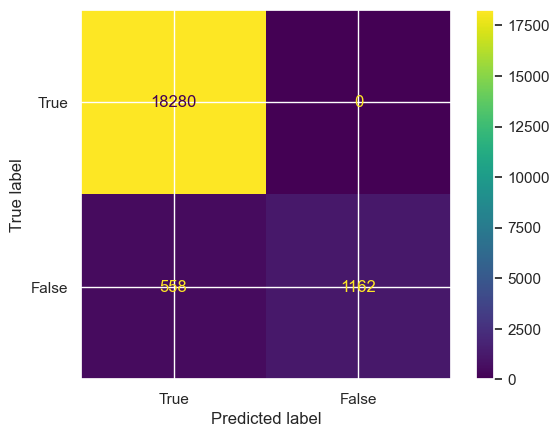

In [145]:
cmt = confusion_matrix(y_test,y_pred_gt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[True,False])

disp.plot()
plt.show()

In [146]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_gt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18278
False postive: 0
False negative: 558
True postive: 1162


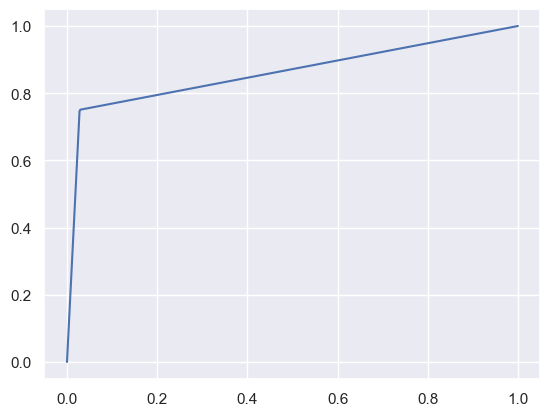

In [147]:
# ROC-AUC Curve
y_gt_pred_prob=gt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_gt_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [150]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [151]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [152]:
param_grid1={
    'C':[1.1,'entropy'],
    'intercept_scaling': [4, 5, 7, 8,9],
    'fit_intercept': [True],
    'warm_start': [False],
    'max_iter': [0,40]
}

In [153]:
import time 
start=time.time()
grid_search1=GridSearchCV(grid_log,param_grid1,
                         scoring='accuracy',
                         cv=5,
                         verbose=True)
end=time.time()
print('total time token is:',(end-start))

total time token is: 0.0


In [154]:
grid_search1.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.1, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 5, 7, 8, 9],
                         'max_iter': [0, 40], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [155]:
grid_search1.best_estimator_

LogisticRegression(C=1.1, intercept_scaling=4, max_iter=40)

In [156]:
from sklearn.linear_model import LogisticRegression
import time 

logistic_regression = LogisticRegression()
start = time.time()
grid_search1.fit(X_train,y_train)
end=time.time()
print('Total time taken is :',(end-start),'secods')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Total time taken is : 6.527570962905884 secods


In [157]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                      fit_intercept= True,
                      max_iter=42,
                      warm_start=False)

log.fit(X_train,y_train)

LogisticRegression(max_iter=42)

In [158]:
grid_search1.best_estimator_

LogisticRegression(C=1.1, intercept_scaling=4, max_iter=40)

In [159]:
grid_search1.best_score_

0.9373624999999999

In [160]:
grid_search1.best_params_

{'C': 1.1,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 40,
 'warm_start': False}

In [161]:
y_pred_log = log.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [163]:
acc_log=round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log))

print("accuracy is:",acc_log)
print("f1 is:",f1_log)
print("recall is:",recall_log)
print("precision is:",precision_log)

accuracy is: 92.97
f1 is: 0.46
recall is: 0.34
precision is: 1


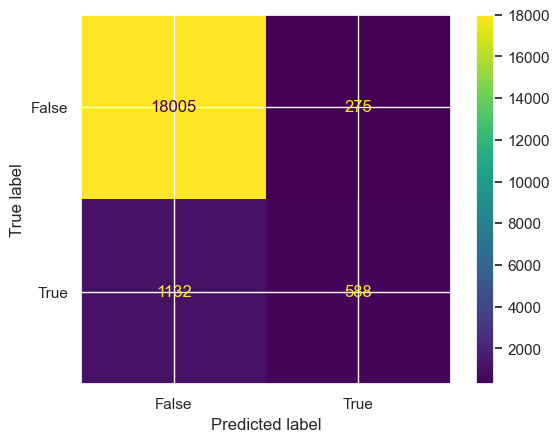

In [164]:
cmt=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [165]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18278
False postive: 275
False negative: 1132
True postive: 588


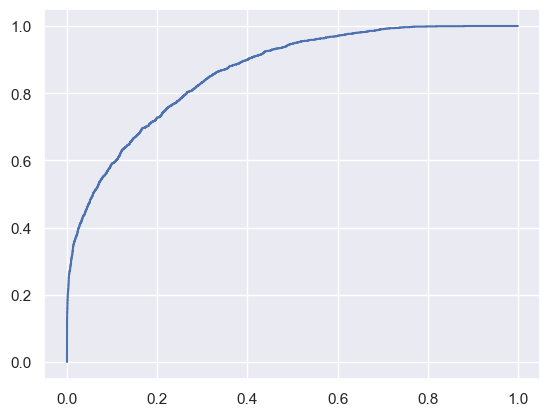

In [166]:
# ROC-AUC Curve
y_log_pred_prob=grid_search1.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [168]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_NB=GaussianNB()
grid_NB

GaussianNB()

In [170]:
grid_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [171]:
param_NB1={
    'priors':[None],
    'var_smoothing': [0.001]
}

In [172]:
import time
start=time.time()
grid_search2=GridSearchCV(grid_NB,param_NB1,
                         scoring='accuracy',
                         cv=3,
                         verbose=True)
end=time.time()
print('Total time taken is:',(end-start))

Total time taken is: 0.0


In [173]:
grid_search2

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [0.001]},
             scoring='accuracy', verbose=True)

In [174]:
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [0.001]},
             scoring='accuracy', verbose=True)

In [175]:
start=time.time()
grid_search2.fit(X_train,y_train)

end=time.time()
print('total time taken is :',(end-start))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
total time taken is : 0.18408489227294922


In [176]:
grid_search2.best_estimator_

GaussianNB(var_smoothing=0.001)

In [177]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None, var_smoothing= 0.001)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.001)

In [178]:
grid_search2.best_score_

0.9485500042027244

In [179]:
grid_search2.best_params_

{'priors': None, 'var_smoothing': 0.001}

In [180]:
y_pred_NB=NB.predict(X_test)

In [181]:
acc_NB=round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB))

print("accuracy is:",acc_NB)
print("f1 is:",f1_NB)
print("recall is:",recall_NB)
print("precision is:",precision_NB)

accuracy is: 94.8
f1 is: 0.61
recall is: 0.47
precision is: 1


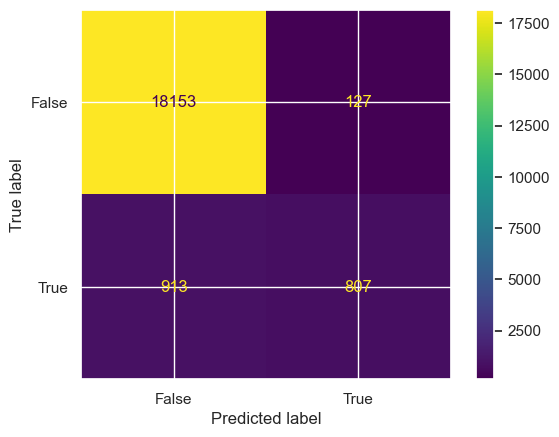

In [182]:
cmt=confusion_matrix(y_test,y_pred_NB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [183]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18278
False postive: 127
False negative: 913
True postive: 807


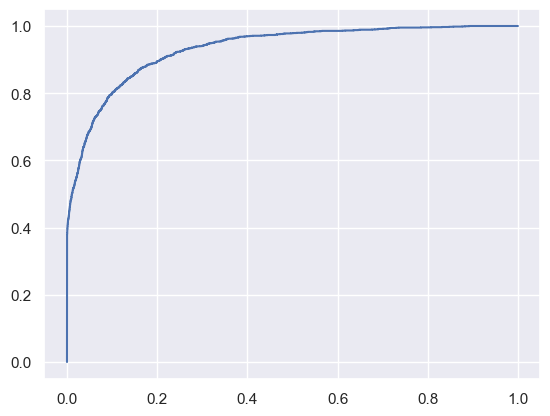

In [184]:
# ROC-AUC Curve
y_NB_pred_prob=grid_search2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [186]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [187]:
grid_KNN=KNeighborsClassifier()
grid_KNN

KNeighborsClassifier()

In [188]:
grid_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [189]:
param_KNN={
    'n_neighbors': [3,4,5,6],
    'leaf_size': [34,12],
    'algorithm':['auto','ball_tree','kd_tree','brute']
    
}

In [191]:
import time
start=time.time()
grid_search3=GridSearchCV(grid_KNN,param_KNN,
                         scoring='accuracy',
                         cv=4,
                         verbose=True)
end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0


In [192]:
grid_search3

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [34, 12], 'n_neighbors': [3, 4, 5, 6]},
             scoring='accuracy', verbose=True)

In [194]:
start=time.time()
grid_search3.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 4 folds for each of 32 candidates, totalling 128 fits
total time taken is: 229.53461241722107


In [195]:
grid_search3.best_estimator_

KNeighborsClassifier(leaf_size=34, n_neighbors=4)

In [196]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors= 12)
KN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [197]:
grid_search3.best_score_

0.953625

In [198]:
grid_search3.best_params_

{'algorithm': 'auto', 'leaf_size': 34, 'n_neighbors': 4}

In [199]:
y_pred_KNN=KN.predict(X_test)

In [200]:
# Matrix
acc_KNN=round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN))

print("accuracy is:",acc_KNN)
print("f1 is:",f1_KNN)
print("recall is:",recall_KNN)
print("precision is:",precision_KNN)

accuracy is: 95.23
f1 is: 0.63
recall is: 0.47
precision is: 1


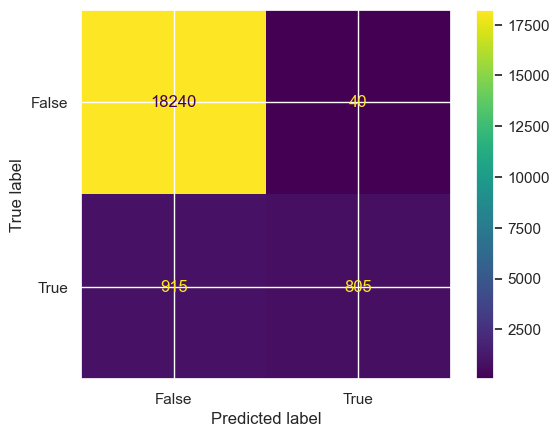

In [201]:
cmt=confusion_matrix(y_test,y_pred_KNN)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [202]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18278
False postive: 40
False negative: 915
True postive: 805


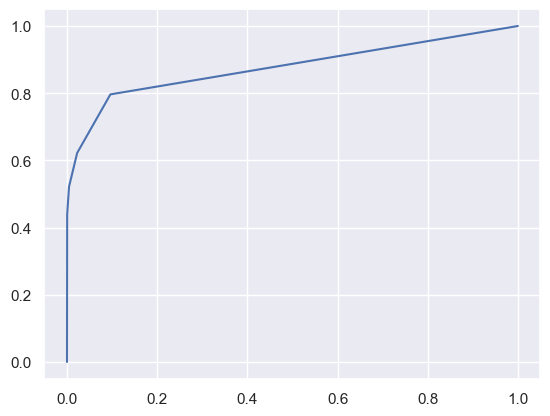

In [203]:
# ROC-AUC Curve
y_KNN_pred_prob=grid_search3.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier()

In [206]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()
grid_RF

RandomForestClassifier()

In [207]:
grid_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [208]:
param_RF={
    'min_samples_leaf': [3,4,5,6,7],
    'oob_score': [False],
    'criterion':['gini']
    
}

In [209]:
import time
start=time.time()
grid_search4=GridSearchCV(grid_RF,param_RF,
                      scoring='accuracy',
                      cv=4,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [210]:
grid_search4

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'oob_score': [False]},
             scoring='accuracy', verbose=True)

In [211]:
start=time.time()
grid_search4.fit(X_train,y_train)

end=time.time()
print('Total time taken is:',(end-start))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Total time taken is: 80.20471835136414


In [213]:
grid_search4.best_estimator_

RandomForestClassifier(min_samples_leaf=6)

In [214]:
from sklearn.ensemble import RandomForestClassifier
RFTree=RandomForestClassifier(criterion='gini',
                              max_depth= 5,
                              max_features='sqrt',
                              n_estimators=100,
                              random_state=0)
RFTree.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [215]:
grid_search4.best_params_

{'criterion': 'gini', 'min_samples_leaf': 6, 'oob_score': False}

In [216]:
# prediction
y_pred_RF=RFTree.predict(X_test)

In [217]:
acc_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF))

print("accuracy is:",acc_RF)
print("f1 is:",f1_RF)
print("recall is:",recall_RF)
print("precision is:",precision_RF)

accuracy is: 97.21
f1 is: 0.81
recall is: 0.68
precision is: 1


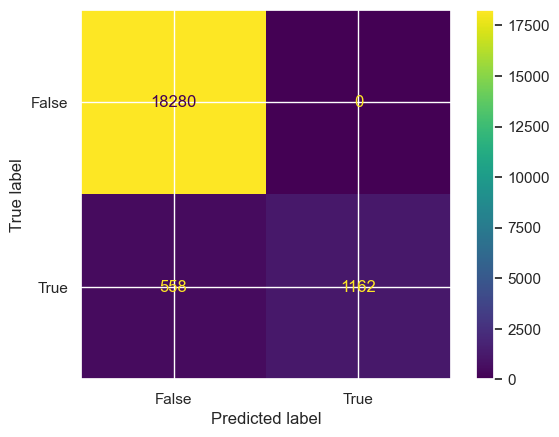

In [218]:
cmt=confusion_matrix(y_test,y_pred_RF)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [219]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18278
False postive: 0
False negative: 558
True postive: 1162


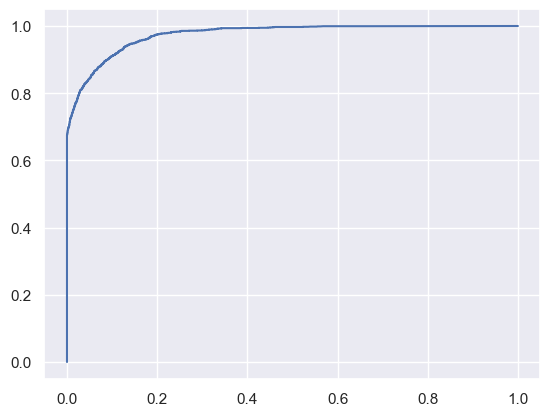

In [220]:
# ROC-AUC Curve
y_RF_pred_prob=grid_search4.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Gradient Boosting

In [221]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier()

GradientBoostingClassifier()

In [222]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_GB=GradientBoostingClassifier()
grid_GB

GradientBoostingClassifier()

In [224]:
grid_GB.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [225]:
param_GB={
    'max_depth': [3,4,5,6],
    'min_samples_leaf': [3,4,5,6],
    'warm_start': [False],
    'min_samples_split': [2,3,5,7],
    'verbose': [0]

}

In [226]:
import time
start=time.time()
grid_search5=GridSearchCV(grid_GB,param_GB,
                      scoring='accuracy',
                      cv=5,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.004433155059814453


In [227]:
grid_search5

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [2, 3, 5, 7], 'verbose': [0],
                         'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [228]:
start=time.time()
grid_search5.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
total time taken is: 3178.4413464069366


In [229]:
grid_search5.best_estimator_

GradientBoostingClassifier(min_samples_leaf=5)

In [238]:
grid_search5.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'verbose': 0,
 'warm_start': False}

In [239]:
from sklearn.ensemble import GradientBoostingClassifier
GBB=GradientBoostingClassifier(
                            max_depth=6,
                            min_samples_leaf=4,
                            min_samples_split=2,
                            random_state=0)
GBB.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=4, random_state=0)

In [240]:
grid_search5.best_score_

0.971775

In [241]:
# prediction
y_pred_GB=GBB.predict(X_test)

In [242]:
acc_GB=round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB))

print("accuracy is:",acc_GB)
print("f1 is:",f1_GB)
print("recall is:",recall_GB)
print("precision is:",precision_GB)

accuracy is: 97.17
f1 is: 0.81
recall is: 0.68
precision is: 1


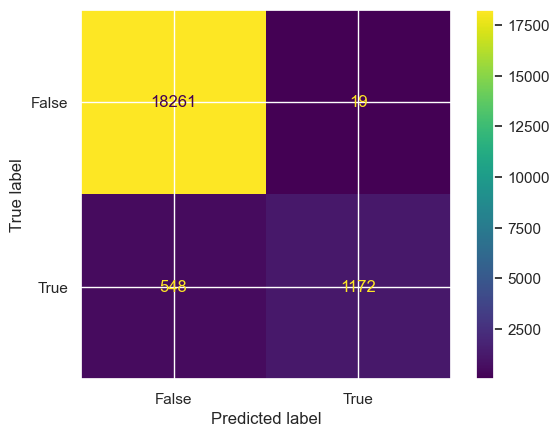

In [243]:
cmt=confusion_matrix(y_test,y_pred_GB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [246]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18278
False postive: 19
False negative: 548
True postive: 1172


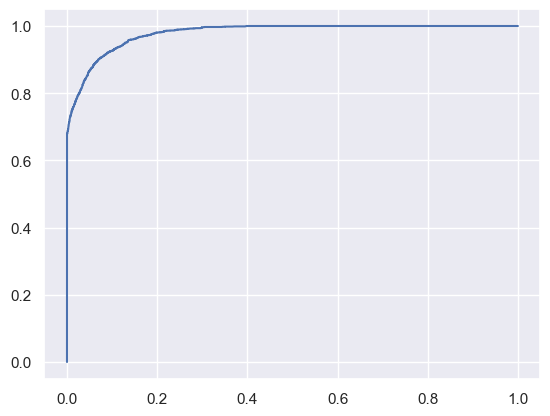

In [247]:
# ROC-AUC Curve
y_GB_pred_prob=grid_search5.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_GB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [248]:
dict1={'Accuracy':[acc_gt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      'precision':[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      'recall':[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      'f1-score':[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}
pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,precision,recall,f1-score
DT,97.21,0.72,0.74,0.73
KNN,95.23,1.00,0.47,0.63
Logistic,92.97,1.00,0.34,0.46
Naive Bayes,94.80,1.00,0.47,0.61
Random Forest,97.21,1.00,0.68,0.81
Gradient Boosting,97.17,1.00,0.68,0.81
